# zomato data analysia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ## importand data analysis

In [2]:
df=pd.read_csv("Zomato data .csv")
df   # reading the data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [24]:
import numpy as np

def handleRate(value):
    if pd.isna(value):
        return np.nan
    value = str(value).split('/')[0]
    try:
        return float(value)
    except ValueError:
        return np.nan

df['rate'] = df['rate'].apply(handleRate)
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [25]:
df.info() ## to know the null values int he given data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [26]:
#type of resturant
df.head() ## shows the strting 5 data
df.tail() #show the bottom 5 values

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9,47,200,Dining


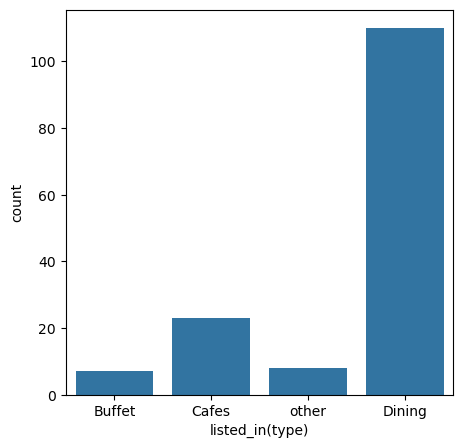

In [27]:
## graphs plotted using the seaborn library 
# this sows which type of the restarunt has more cusromers
plt.figure(figsize=(5,5))
sns.countplot(x=df['listed_in(type)'])
plt.show()

conclusion: maority of the resturan falls in the dining

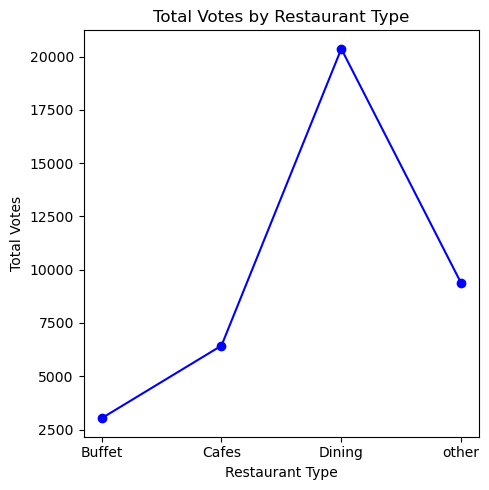

In [28]:
# wich resturant has how many votes are there 
# which restaurant type has how many votes
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame(grouped_data)
plt.figure(figsize=(5,5))
plt.plot(result.index, result['votes'], color="blue", marker='o')## that marker means give the point and colour gives the line color
plt.xlabel("Restaurant Type")
plt.ylabel("Total Votes")
plt.title("Total Votes by Restaurant Type")
plt.tight_layout()
plt.show()


conclusion:dining resturants has the maximum votes

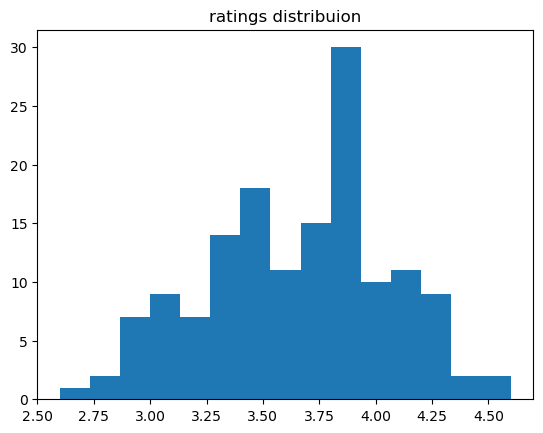

In [29]:
# 3.rating that the majority of the customers have on the resturant
## use histogram to plot this ratings
plt.hist(df['rate'],bins=15)
plt.title("ratings distribuion")
plt.show()

conclusion: the majority resturant received ratingd from 3.5 to 4 

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

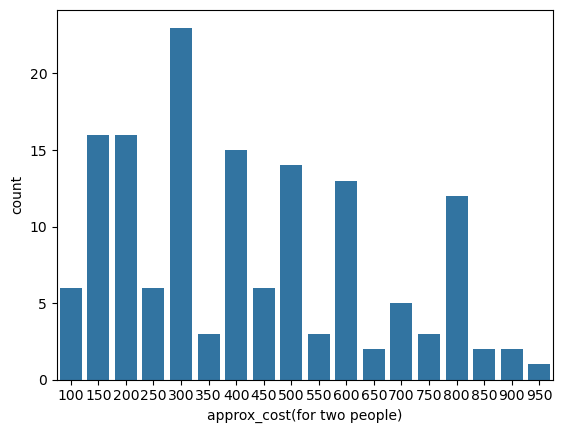

In [30]:
## most couples order most so what is the average spending on the food.
# use the countplot  to plot the graph
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

conclusion: the majority of couples prefer resturant with an approximate cost of  300 rupees 

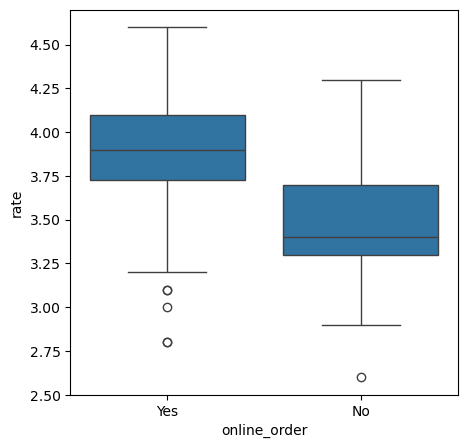

In [31]:
## which mode has received the maximum number of ratings(online/ofline)
# use box plot to show the differences of the each mode
plt.figure(figsize=(5,5))
sns.boxplot(x='online_order',y='rate',data=df)
plt.show()

conclusion:offline orde recive lower rating in comparison to online order

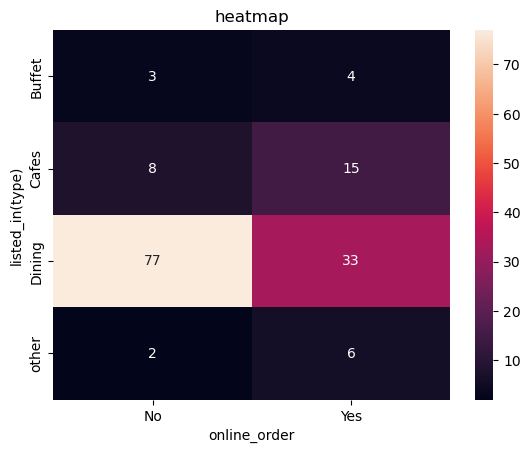

In [32]:
## using the heat map Shows how strongly variables are related to each other
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,fmt='d')
plt.title("heatmap")
plt.show()

conclusion: dining resturants primarliy accept offline orders whereas cafes primarily receive online orders.this suggests that clients prefers orders in person at resturants ,but prefer online ordering at cafes.

In [ ]:
## INSIGHTS
The majority of customers place orders from Casual Dining and Quick Bites restaurants.
Casual Dining restaurants have received the highest number of votes
Most restaurants have ratings between 3.5 and 4.2.
This suggests that the majority of restaurants provide good but not exceptional service.
Couples who prefer online ordering spend an average amount in the mid-price range per order
Online ordering mode has received higher average ratings compared to offline mode.
Casual Dining restaurants received more offline orders compared to other restaurant types.